# Reload

In [1]:
import numpy as np 
import pyarrow
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

df_original_data = pd.read_csv('../Data/haircut.csv')
df_bootstrap_samples = pd.read_csv('../Data/bootstrap_samples.csv').drop('Unnamed: 0', axis=1)
df_parameter_estimates_percentile = pd.read_csv('../Data/Percentile Estimates Data.csv').drop('Unnamed: 0', axis=1)
df_percentile_standard_deviations_comparison = pd.read_csv('../Data/Percentile Means Comparison Samples.csv').drop('Unnamed: 0', axis=1)
df_bootstrap_t_samples = pd.read_csv('../Data/bootstrap_t_samples.csv').drop('Unnamed: 0', axis=1)
df_parameter_estimates_bootstrap_t = pd.read_csv('../Data/Bootstrap t Estimates Data.csv').drop('Unnamed: 0', axis=1)

number_of_values_per_sample = len(df_original_data)
number_of_bootstrap_samples = 500
number_of_bootstrap_t_samples = 500
percentile_method_alpha = 0.10
bootstrap_t_alpha = 0.10

# Setup

## Load Libraries

In [1]:
!pip install pyarrow

In [3]:
import numpy as np 
import pyarrow
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

## Set Values

In [8]:
number_of_bootstrap_samples = 500
number_of_bootstrap_t_samples = 500
percentile_method_alpha = 0.10
bootstrap_t_alpha = 0.10

## Create Original Dataframe

In [3]:
# Load in the original data's dataframe
df_original_data = pd.read_csv('../Data/haircut.csv')

In [14]:
number_of_values_per_sample = len(df_original_data)
print(number_of_values_per_sample)

15


# Percentile Method

## Create Bootstrap Sample Dataframe and Generate Samples

In [6]:
# Define a function that will sample, with replacement, from the original sample for the prescribed number of times.
def generage_bootstrap_samples(data):
    return np.random.choice(data, size=len(data), replace=True)

In [15]:
# Create our empty dataframe.
df_bootstrap_samples = pd.DataFrame(index=range(len(df_original_data)), columns=[f'Bootstrap Sample {i+1}' for i in range(number_of_bootstrap_samples)])

In [22]:
# Generate our samples.
for i in range(number_of_bootstrap_samples):
    bootstrap_sample_values = generage_bootstrap_samples(df_original_data['Response (In Dollars)'])
    df_bootstrap_samples[f'Bootstrap Sample {i+1}'] = bootstrap_sample_values

In [24]:
# Save the dataframe
df_bootstrap_samples.to_csv('../Data/bootstrap_samples.csv')

In [7]:
# Load the dataframe, if necessary
df_bootstrap_samples = pd.read_csv('../Data/bootstrap_samples.csv')

## Generate Percentile Method Parameters

In [59]:
# Create our dataframe
df_parameter_estimates_percentile = pd.DataFrame(index=range(1, number_of_bootstrap_samples + 1), columns=['Original Index', 'Sample Mean', 'Sample Mean Rank', 'Sample Standard Deviation', 'Sample Standard Deviation Rank'])

In [60]:
# Populate the DataFrame with the parameter values.
for i in range(1, number_of_bootstrap_samples + 1):
    # Get the i-th bootstrap sample from our bootstrap samples dataframe.
    bootstrap_sample = df_bootstrap_samples[f'Bootstrap Sample {i}']
    
    # Calculate the sample parameters.
    sample_mean = bootstrap_sample.mean()
    sample_standard_deviation = bootstrap_sample.std()
    
    # Populate DataFrame
    df_parameter_estimates_percentile.loc[i, 'Original Index'] = i
    df_parameter_estimates_percentile.loc[i, 'Sample Mean'] = sample_mean
    df_parameter_estimates_percentile.loc[i, 'Sample Standard Deviation'] = sample_standard_deviation

## Order Percentile Parameter Values

In [61]:
# Rank order the sample means
df_parameter_estimates_percentile.sort_values(by='Sample Mean', inplace=True)
df_parameter_estimates_percentile['Sample Mean Rank'] = range(1, number_of_bootstrap_samples + 1)
df_parameter_estimates_percentile.sort_values(by='Original Index', inplace=True)

In [62]:
# Rank order the sample standard deviations
df_parameter_estimates_percentile.sort_values(by='Sample Standard Deviation', inplace=True)
df_parameter_estimates_percentile['Sample Standard Deviation Rank'] = range(1, number_of_bootstrap_samples + 1)
df_parameter_estimates_percentile.sort_values(by='Original Index', inplace=True)

## Find Confidence Interval Values & Their Indices

In [64]:
lower_percentile_rank_value = int(np.floor(number_of_bootstrap_samples*(percentile_method_alpha/2) + 1))
upper_percentile_rank_value = int(np.floor(number_of_bootstrap_samples*(1 - percentile_method_alpha/2) + 1))

print(f'Percentile Method Alpha Value: {percentile_method_alpha}.')
print(f'Lower Percentile Rank Value: {lower_percentile_rank_value}.')
print(f'Upper Percentile Rank Value: {upper_percentile_rank_value}.')

Percentile Method Alpha Value: 0.1.
Lower Percentile Rank Value: 26.
Upper Percentile Rank Value: 476.


In [65]:
lower_percentile_sample_mean = df_parameter_estimates_percentile[df_parameter_estimates_percentile['Sample Mean Rank'] == lower_percentile_rank_value]['Sample Mean'].values[0]
lower_percentile_sample_mean_original_index_value = df_parameter_estimates_percentile[df_parameter_estimates_percentile['Sample Mean Rank'] == lower_percentile_rank_value]['Original Index'].values[0]
upper_percentile_sample_mean = df_parameter_estimates_percentile[df_parameter_estimates_percentile['Sample Mean Rank'] == upper_percentile_rank_value]['Sample Mean'].values[0]
upper_percentile_sample_mean_original_index_value = df_parameter_estimates_percentile[df_parameter_estimates_percentile['Sample Mean Rank'] == upper_percentile_rank_value]['Original Index'].values[0]

print(f'Percentile Method Confidence Interval: ({lower_percentile_sample_mean},{upper_percentile_sample_mean}).')
print(f'Lower Value Original Index: {lower_percentile_sample_mean_original_index_value}.')
print(f'Upper Value Original Index: {upper_percentile_sample_mean_original_index_value}.')

Percentile Method Confidence Interval: (41.6,75.46666666666667).
Lower Value Original Index: 385.
Upper Value Original Index: 349.


In [66]:
lower_percentile_sample_standard_deviation = df_parameter_estimates_percentile[df_parameter_estimates_percentile['Sample Standard Deviation Rank'] == lower_percentile_rank_value]['Sample Standard Deviation'].values[0]
lower_percentile_sample_standard_deviation_original_index_value = df_parameter_estimates_percentile[df_parameter_estimates_percentile['Sample Standard Deviation Rank'] == lower_percentile_rank_value]['Original Index'].values[0]
upper_percentile_sample_standard_deviation = df_parameter_estimates_percentile[df_parameter_estimates_percentile['Sample Standard Deviation Rank'] == upper_percentile_rank_value]['Sample Standard Deviation'].values[0]
upper_percentile_sample_standard_deviation_original_index_value = df_parameter_estimates_percentile[df_parameter_estimates_percentile['Sample Standard Deviation Rank'] == upper_percentile_rank_value]['Original Index'].values[0]

print(f'Percentile Method Confidence Interval: ({lower_percentile_sample_standard_deviation},{upper_percentile_sample_standard_deviation}).')
print(f'Lower Value Original Index: {lower_percentile_sample_standard_deviation_original_index_value}.')
print(f'Upper Value Original Index: {upper_percentile_sample_standard_deviation_original_index_value}.')

Percentile Method Confidence Interval: (25.502941006872128,55.17608177462406).
Lower Value Original Index: 385.
Upper Value Original Index: 462.


In [67]:
# Save to a dataframe
df_parameter_estimates_percentile.to_csv('../Data/Percentile Estimates Data.csv')

In [68]:
# Load the dataframe, if necessary
df_parameter_estimates_percentile = pd.read_csv('../Data/Percentile Estimates Data.csv').drop('Unnamed: 0', axis=1)

## Percentile Method: Graph The Outcomes (Means)

### Percentile Method Means

In [69]:
# Our Confidence Interval Sample Values
lower_percentile_sample_row = df_parameter_estimates_percentile.loc[df_parameter_estimates_percentile['Sample Mean Rank'] == lower_percentile_rank_value]
lower_percentile_sample_row_original_index = int(lower_percentile_sample_row.iloc[0]['Original Index'])

upper_percentile_sample_row = df_parameter_estimates_percentile.loc[df_parameter_estimates_percentile['Sample Mean Rank'] == upper_percentile_rank_value]
upper_percentile_sample_row_original_index = int(upper_percentile_sample_row.iloc[0]['Original Index'])

In [70]:
# We want boxplots for these, so we'll fetch them from the original bootstrap sample list.
upper_percentile_bootstrap_sample = df_bootstrap_samples[f'Bootstrap Sample {upper_percentile_sample_row_original_index}']
lower_percentile_bootstrap_sample = df_bootstrap_samples[f'Bootstrap Sample {lower_percentile_sample_row_original_index}']

In [71]:
# We will include the 25th, 50th, and 75th percentile values for comparison.
percentile_sample_row_25 = df_parameter_estimates_percentile.loc[df_parameter_estimates_percentile['Sample Mean Rank'] == int(np.floor(number_of_bootstrap_samples*0.25))]
percentile_sample_row_25_original_index = int(percentile_sample_row_25.iloc[0]['Original Index'])
percentile_bootstrap_sample_25th = df_bootstrap_samples[f'Bootstrap Sample {percentile_sample_row_25_original_index}']

percentile_sample_row_50 = df_parameter_estimates_percentile.loc[df_parameter_estimates_percentile['Sample Mean Rank'] == int(np.floor(number_of_bootstrap_samples*0.50))]
percentile_sample_row_50_original_index = int(percentile_sample_row_50.iloc[0]['Original Index'])
percentile_bootstrap_sample_50th = df_bootstrap_samples[f'Bootstrap Sample {percentile_sample_row_50_original_index}']

percentile_sample_row_75 = df_parameter_estimates_percentile.loc[df_parameter_estimates_percentile['Sample Mean Rank'] == int(np.floor(number_of_bootstrap_samples*0.75))]
percentile_sample_row_75_original_index = int(percentile_sample_row_75.iloc[0]['Original Index'])
percentile_bootstrap_sample_75th = df_bootstrap_samples[f'Bootstrap Sample {percentile_sample_row_75_original_index}']

In [72]:
print(f'Lower Interval Index Value - Ranked Percentile Samples: {lower_percentile_rank_value}')
print(f'Lower Interval Index Value - Original Percentile Samples: {lower_percentile_sample_row_original_index} \n')

print(f'25th Percentile Index Value - Ranked Percentile Samples: {int(np.floor(number_of_bootstrap_samples*0.25))}')
print(f'25th Percentile Index Value - Original Percentile Samples: {percentile_sample_row_25_original_index} \n')

print(f'50th Percentile Index Value - Percentile Samples: {int(np.floor(number_of_bootstrap_samples*0.50))}')
print(f'50th Percentile Index Value - Original Percentile Samples: {percentile_sample_row_50_original_index} \n')

print(f'75th Percentile Index Value - Percentile Samples: {int(np.floor(number_of_bootstrap_samples*0.75))}')
print(f'75th Percentile Index Value - Original Percentile Samples: {percentile_sample_row_75_original_index}\n')

print(f'Upper Interval Index Value - Ranked Percentile Samples: {upper_percentile_rank_value}')
print(f'Upper Interval Index Value - Original Percentile Samples: {upper_percentile_sample_row_original_index} \n')

Lower Interval Index Value - Ranked Percentile Samples: 26
Lower Interval Index Value - Original Percentile Samples: 385 

25th Percentile Index Value - Ranked Percentile Samples: 125
25th Percentile Index Value - Original Percentile Samples: 138 

50th Percentile Index Value - Percentile Samples: 250
50th Percentile Index Value - Original Percentile Samples: 274 

75th Percentile Index Value - Percentile Samples: 375
75th Percentile Index Value - Original Percentile Samples: 92

Upper Interval Index Value - Ranked Percentile Samples: 476
Upper Interval Index Value - Original Percentile Samples: 349 



### Save Means Comparison Values Dataframe to CSV

In [73]:
df_percentile_means_comparison = pd.DataFrame({
    'Original Sample': df_original_data['Response (In Dollars)'],
    'Lower Percentile Bootstrap Sample': lower_percentile_bootstrap_sample,
    'Upper Percentile Bootstrap Sample': upper_percentile_bootstrap_sample,
    '25th Percentile': percentile_bootstrap_sample_25th,
    '50th Percentile (Median)': percentile_bootstrap_sample_50th,
    '75th Percentile': percentile_bootstrap_sample_75th
})

In [74]:
# Save our dataframe to a csv file
df_percentile_means_comparison.to_csv('../Data/Percentile Means Comparison Samples.csv')

In [75]:
# Load the dataframe from the csv file (if necessary)
df_percentile_comparison = pd.read_csv('../Data/Percentile Means Comparison Samples.csv').drop('Unnamed: 0', axis=1)

### Clean Dataframe for Graph

In [76]:
df_percentile_means_comparison_renamed = df_percentile_comparison.copy().rename(columns={
    'Original Sample' : 'Original',
    'Lower Percentile Bootstrap Sample': 'Lower Bound',
    '25th Percentile' : '25%',
    '50th Percentile (Median)': 'Median',
    '75th Percentile' : '75%',
    'Upper Percentile Bootstrap Sample': 'Upper Bound'
})

In [77]:
df_percentile_means_comparison.mean()

Original Sample                      56.400000
Lower Percentile Bootstrap Sample    41.600000
Upper Percentile Bootstrap Sample    75.466667
25th Percentile                      49.333333
50th Percentile (Median)             55.733333
75th Percentile                      63.733333
dtype: float64

### Boxplot Graph

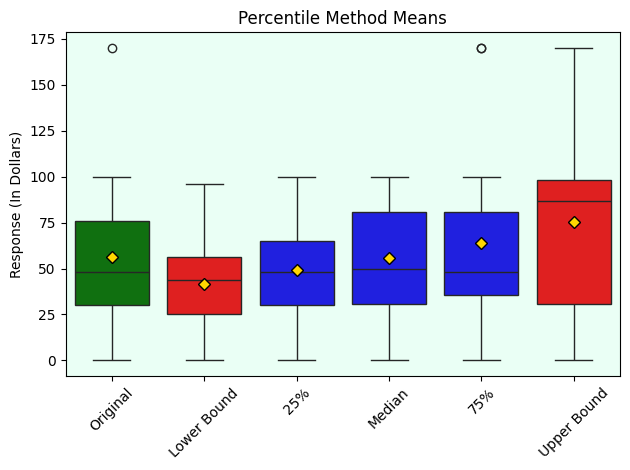

In [78]:
# I want to show the original and then the remaining samples in order of the sample mean.
order = ['Original', 'Lower Bound', '25%', 'Median', '75%', 'Upper Bound']

# Draw the boxplot
ax = sns.boxplot(data=df_percentile_means_comparison_renamed, order=order, palette=['g', 'r', 'r', 'b', 'b', 'b'], showmeans=True, meanprops={'marker':'D', 'markerfacecolor':'gold', 'markeredgecolor':'black'})
plt.xticks(rotation=45)

# Add grey background
ax.set_facecolor('#eafff5')

# Labels
ax.set_ylabel('Response (In Dollars)', color='black')

# Add Layout Setting & Title
plt.title('Percentile Method Means')
plt.tight_layout()

# Show the plot
plt.show()

## Percentile Method: Graph the Outcomes (Standard Deviations)

### Percentile Method Standard Deviations

In [79]:
# Our Confidence Interval Sample Values
lower_percentile_sample_row = df_parameter_estimates_percentile.loc[df_parameter_estimates_percentile['Sample Standard Deviation Rank'] == lower_percentile_rank_value]
lower_percentile_sample_row_original_index = int(lower_percentile_sample_row.iloc[0]['Original Index'])

upper_percentile_sample_row = df_parameter_estimates_percentile.loc[df_parameter_estimates_percentile['Sample Standard Deviation Rank'] == upper_percentile_rank_value]
upper_percentile_sample_row_original_index = int(upper_percentile_sample_row.iloc[0]['Original Index'])

In [80]:
# We want boxplots for these, so we'll fetch them from the original bootstrap sample list.
upper_percentile_bootstrap_sample = df_bootstrap_samples[f'Bootstrap Sample {upper_percentile_sample_row_original_index}']
lower_percentile_bootstrap_sample = df_bootstrap_samples[f'Bootstrap Sample {lower_percentile_sample_row_original_index}']

In [81]:
# Our Confidence Interval Sample Values
lower_percentile_sample_row = df_parameter_estimates_percentile.loc[df_parameter_estimates_percentile['Sample Standard Deviation Rank'] == lower_percentile_rank_value]
lower_percentile_sample_row_original_index = int(lower_percentile_sample_row.iloc[0]['Original Index'])

upper_percentile_sample_row = df_parameter_estimates_percentile.loc[df_parameter_estimates_percentile['Sample Standard Deviation Rank'] == upper_percentile_rank_value]
upper_percentile_sample_row_original_index = int(upper_percentile_sample_row.iloc[0]['Original Index'])

In [82]:
# We want boxplots for these, so we'll fetch them from the original bootstrap sample list.
upper_percentile_bootstrap_sample = df_bootstrap_samples[f'Bootstrap Sample {upper_percentile_sample_row_original_index}']
lower_percentile_bootstrap_sample = df_bootstrap_samples[f'Bootstrap Sample {lower_percentile_sample_row_original_index}']

In [83]:
# We will include the 25th, 50th, and 75th percentile values for comparison.
percentile_sample_row_25 = df_parameter_estimates_percentile.loc[df_parameter_estimates_percentile['Sample Standard Deviation Rank'] == int(np.floor(number_of_bootstrap_samples*0.25))]
percentile_sample_row_25_original_index = int(percentile_sample_row_25.iloc[0]['Original Index'])
percentile_bootstrap_sample_25th = df_bootstrap_samples[f'Bootstrap Sample {percentile_sample_row_25_original_index}']

percentile_sample_row_50 = df_parameter_estimates_percentile.loc[df_parameter_estimates_percentile['Sample Standard Deviation Rank'] == int(np.floor(number_of_bootstrap_samples*0.50))]
percentile_sample_row_50_original_index = int(percentile_sample_row_50.iloc[0]['Original Index'])
percentile_bootstrap_sample_50th = df_bootstrap_samples[f'Bootstrap Sample {percentile_sample_row_50_original_index}']

percentile_sample_row_75 = df_parameter_estimates_percentile.loc[df_parameter_estimates_percentile['Sample Standard Deviation Rank'] == int(np.floor(number_of_bootstrap_samples*0.75))]
percentile_sample_row_75_original_index = int(percentile_sample_row_75.iloc[0]['Original Index'])
percentile_bootstrap_sample_75th = df_bootstrap_samples[f'Bootstrap Sample {percentile_sample_row_75_original_index}']

In [84]:
print(f'Lower Interval Index Value - Ranked Percentile Samples: {lower_percentile_rank_value}')
print(f'Lower Interval Index Value - Original Percentile Samples: {lower_percentile_sample_row_original_index} \n')

print(f'25th Percentile Index Value - Ranked Percentile Samples: {int(np.floor(number_of_bootstrap_samples*0.25))}')
print(f'25th Percentile Index Value - Original Percentile Samples: {percentile_sample_row_25_original_index} \n')

print(f'50th Percentile Index Value - Percentile Samples: {int(np.floor(number_of_bootstrap_samples*0.50))}')
print(f'50th Percentile Index Value - Original Percentile Samples: {percentile_sample_row_50_original_index} \n')

print(f'75th Percentile Index Value - Percentile Samples: {int(np.floor(number_of_bootstrap_samples*0.75))}')
print(f'75th Percentile Index Value - Original Percentile Samples: {percentile_sample_row_75_original_index}\n')

print(f'Upper Interval Index Value - Ranked Percentile Samples: {upper_percentile_rank_value}')
print(f'Upper Interval Index Value - Original Percentile Samples: {upper_percentile_sample_row_original_index} \n')

Lower Interval Index Value - Ranked Percentile Samples: 26
Lower Interval Index Value - Original Percentile Samples: 385 

25th Percentile Index Value - Ranked Percentile Samples: 125
25th Percentile Index Value - Original Percentile Samples: 369 

50th Percentile Index Value - Percentile Samples: 250
50th Percentile Index Value - Original Percentile Samples: 357 

75th Percentile Index Value - Percentile Samples: 375
75th Percentile Index Value - Original Percentile Samples: 296

Upper Interval Index Value - Ranked Percentile Samples: 476
Upper Interval Index Value - Original Percentile Samples: 462 



### Save Standard Deviations Comparison Values Dataframe to CSV

In [85]:
df_percentile_standard_deviations_comparison = pd.DataFrame({
    'Original Sample': df_original_data['Response (In Dollars)'],
    'Lower Percentile Bootstrap Sample': lower_percentile_bootstrap_sample,
    'Upper Percentile Bootstrap Sample': upper_percentile_bootstrap_sample,
    '25th Percentile': percentile_bootstrap_sample_25th,
    '50th Percentile (Median)': percentile_bootstrap_sample_50th,
    '75th Percentile': percentile_bootstrap_sample_75th
})

In [86]:
# Save our dataframe to a csv file
df_percentile_standard_deviations_comparison.to_csv('../Data/Percentile Means Comparison Samples.csv')

In [87]:
# Load the dataframe from the csv file (if necessary)
df_percentile_standard_deviations_comparison = pd.read_csv('../Data/Percentile Means Comparison Samples.csv').drop('Unnamed: 0', axis=1)

### Clean Up Dataframe for Plot

In [88]:
df_percentile_standard_deviations_comparison_renamed = df_percentile_comparison.copy().rename(columns={
    'Original Sample' : 'Original',
    'Lower Percentile Bootstrap Sample': 'Lower Bound',
    '25th Percentile' : '25%',
    '50th Percentile (Median)': 'Median',
    '75th Percentile' : '75%',
    'Upper Percentile Bootstrap Sample': 'Upper Bound'
})

In [89]:
df_percentile_standard_deviations_comparison_renamed.std()

Original       43.859842
Lower Bound    25.502941
Upper Bound    50.594843
25%            31.927746
Median         32.258923
75%            50.044932
dtype: float64

### Line Plot

<Figure size 640x480 with 0 Axes>

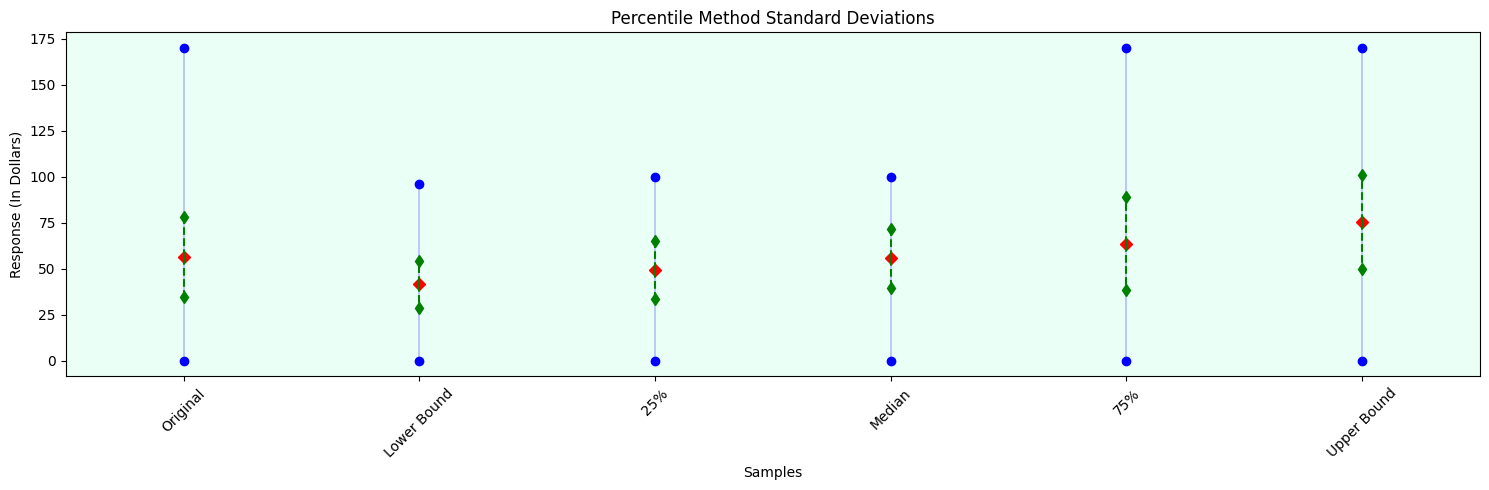

In [90]:
# Clear the plot, in case there's any artifacts from a previous plot.
plt.clf()

# We want them all to be in a single plot.
plt.figure(figsize=(15, 5))

# Define the order of columns as they should appear in the plot.
column_order = ['Original', 'Lower Bound', '25%', 'Median', '75%', 'Upper Bound']

# Set the initial x-coordinate.
x_coord = 1

# Set the width of each line plot.
line_width = 0.3

# We iterate over each column in the desired order and draw the lines.
for column_name in column_order:
    # Extract the column of interest from the dataframe
    column_values = df_percentile_standard_deviations_comparison_renamed[column_name]

    # Calculate the Mean and Standard Deviation values.
    mean_value = column_values.mean()
    std_dev = column_values.std()

    # Set the Max, Mean, and Min values.
    lower_value = column_values.min()
    middle_value = mean_value
    upper_value = column_values.max()

    # We want to show a spread for the std. dev. based on the mean, so we'll have half the std. dev. value above the mean and half below.
    point1 = mean_value + std_dev/2
    point2 = mean_value - std_dev/2

    # Plot the line with adjusted width.
    plt.plot([x_coord, x_coord], [lower_value, upper_value], color='blue', linestyle='-', marker='o', linewidth=line_width)

    # Plot the mean point.
    plt.plot(x_coord, middle_value, color='red', marker='D')

    # Plot standard deviation spread points.
    plt.plot(x_coord, point1, color='green', marker='d')
    plt.plot(x_coord, point2, color='green', marker='d')

    # Plot line segments.
    plt.plot([x_coord, x_coord], [middle_value, point1], color='green', linestyle='--')
    plt.plot([x_coord, x_coord], [middle_value, point2], color='green', linestyle='--')

    # Increment the x-coordinate for the next plot so that the lines don't all overlap.
    x_coord += 1

# Add background color.
plt.gca().set_facecolor('#eafff5')

# Labels
plt.ylabel('Response (In Dollars)', color='black')
plt.xlabel('Samples', color='black')

# Set 'x-axis' ticks and labels (Instead of x numbers, we get the column labels).
plt.xticks(range(1, len(column_order) + 1), column_order)

# Rotate the 'x-axis' Labels.
plt.xticks(rotation=45)

# Set the x-axis limits to reduce space between lines.
plt.xlim(0.5, len(column_order) + 0.5)

# Add Layout Setting & Title
plt.title('Percentile Method Standard Deviations')
plt.tight_layout()

# Show the plot
plt.show()


# Bootstrap t Method

## Create Bootstrap Sample Dataframe and Generate Samples

In [106]:
# Define a function that will sample, with replacement, from the original sample for the prescribed number of times.
def generage_bootstrap_samples(data):
    return np.random.choice(data, size=len(data), replace=True)

In [107]:
# Create our empty dataframe.
df_bootstrap_t_samples = pd.DataFrame(index=range(len(df_original_data)), columns=[f'Bootstrap Sample {i+1}' for i in range(number_of_bootstrap_t_samples)])

In [108]:
# Generate our samples.
for i in range(number_of_bootstrap_t_samples):
    bootstrap_t_sample_values = generage_bootstrap_samples(df_original_data['Response (In Dollars)'])
    df_bootstrap_t_samples[f'Bootstrap Sample {i+1}'] = bootstrap_t_sample_values

In [109]:
# Save the dataframe
df_bootstrap_t_samples.to_csv('../Data/bootstrap_t_samples.csv')

In [112]:
# Load the dataframe, if necessary
df_bootstrap_t_samples = pd.read_csv('../Data/bootstrap_t_samples.csv').drop('Unnamed: 0', axis=1)

## Generate Bootstrap t Parameters

In [5]:
original_mean = df_original_data['Response (In Dollars)'].mean()
original_standard_deviation = df_original_data['Response (In Dollars)'].std()

print(f'The Original Mean Is: {original_mean}')
print(f'The Original Standard Deviation Is: {original_standard_deviation}')

The Original Mean Is: 56.4
The Original Standard Deviation Is: 43.85984170383785


In [12]:
# Create our dataframe
df_parameter_estimates_bootstrap_t = pd.DataFrame(index=range(1, number_of_bootstrap_samples + 1), columns=['Original Index', 'Sample Mean', 'Sample Mean Rank', 'Sample Standard Deviation', 'Sample Standard Deviation Rank'])

In [15]:
# Populate the DataFrame with the parameter values.
for i in range(1, number_of_bootstrap_t_samples + 1):
    # Get the i-th bootstrap sample from our bootstrap samples dataframe.
    bootstrap_t_sample = df_bootstrap_t_samples[f'Bootstrap Sample {i}']
    
    # Calculate the sample parameters.
    sample_mean = bootstrap_t_sample.mean()
    sample_standard_deviation = bootstrap_t_sample.std()

    # Calculate t Values
    sample_mean_t_value = (sample_mean - original_mean)/(sample_standard_deviation/np.sqrt(number_of_values_per_sample))
    
    # Populate DataFrame
    df_parameter_estimates_bootstrap_t.loc[i, 'Original Index'] = i
    df_parameter_estimates_bootstrap_t.loc[i, 'Sample Mean'] = sample_mean
    df_parameter_estimates_bootstrap_t.loc[i, "Sample Mean t Value"] = sample_mean_t_value
    df_parameter_estimates_bootstrap_t.loc[i, 'Sample Standard Deviation'] = sample_standard_deviation

## Order Bootstrap t Parameter Values

In [16]:
# Rank order the sample means
df_parameter_estimates_bootstrap_t.sort_values(by='Sample Mean', inplace=True)
df_parameter_estimates_bootstrap_t['Sample Mean Rank'] = range(1, number_of_bootstrap_t_samples + 1)
df_parameter_estimates_bootstrap_t.sort_values(by='Original Index', inplace=True)

In [17]:
# Rank order the sample standard deviations
df_parameter_estimates_bootstrap_t.sort_values(by='Sample Standard Deviation', inplace=True)
df_parameter_estimates_bootstrap_t['Sample Standard Deviation Rank'] = range(1, number_of_bootstrap_t_samples + 1)
df_parameter_estimates_bootstrap_t.sort_values(by='Original Index', inplace=True)

In [18]:
# Rank order the sample mean t values
df_parameter_estimates_bootstrap_t.sort_values(by='Sample Mean t Value', inplace=True)
df_parameter_estimates_bootstrap_t['Sample Mean t Value Rank'] = range(1, number_of_bootstrap_t_samples + 1)
df_parameter_estimates_bootstrap_t.sort_values(by='Original Index', inplace=True)

## Find the Confidence Intervals and Their Indicies

In [19]:
bootstrap_t_lower_percentile_rank_value = int(np.floor(number_of_bootstrap_t_samples*(bootstrap_t_alpha/2) + 1))
bootstrap_t_upper_percentile_rank_value = int(np.floor(number_of_bootstrap_t_samples*(1 - bootstrap_t_alpha/2) + 1))

print(f'Bootstrap t Method Alpha Value: {bootstrap_t_alpha}.')
print(f'Lower Bootstrap t Rank Value: {bootstrap_t_lower_percentile_rank_value}.')
print(f'Upper Bootstrap t Rank Value: {bootstrap_t_upper_percentile_rank_value}.')

Bootstrap t Method Alpha Value: 0.1.
Lower Bootstrap t Rank Value: 26.
Upper Bootstrap t Rank Value: 476.


In [21]:
bootstrap_t_lower_percentile_sample_mean_t = df_parameter_estimates_bootstrap_t[df_parameter_estimates_bootstrap_t['Sample Mean t Value Rank'] == bootstrap_t_lower_percentile_rank_value]['Sample Mean t Value'].values[0]
bootstrap_t_lower_percentile_sample_mean_t_original_index_value = df_parameter_estimates_bootstrap_t[df_parameter_estimates_bootstrap_t['Sample Mean t Value Rank'] == bootstrap_t_lower_percentile_rank_value]['Original Index'].values[0]


bootstrap_t_upper_percentile_sample_mean_t = df_parameter_estimates_bootstrap_t[df_parameter_estimates_bootstrap_t['Sample Mean t Value Rank'] == bootstrap_t_upper_percentile_rank_value]['Sample Mean t Value'].values[0]
bootstrap_t_upper_percentile_sample_mean_t_original_index_value = df_parameter_estimates_bootstrap_t[df_parameter_estimates_bootstrap_t['Sample Mean t Value Rank'] == bootstrap_t_upper_percentile_rank_value]['Original Index'].values[0]

bootstrap_t_lower_percentile_sample_mean = original_mean - bootstrap_t_upper_percentile_sample_mean_t*(original_standard_deviation/np.sqrt(number_of_values_per_sample))
bootstrap_t_upper_percentile_sample_mean = original_mean - bootstrap_t_lower_percentile_sample_mean_t*(original_standard_deviation/np.sqrt(number_of_values_per_sample))

print(f'Bootstrap t Method Confidence Interval for T: ({bootstrap_t_lower_percentile_sample_mean_t},{bootstrap_t_upper_percentile_sample_mean_t}).')
print(f'Lower Value Original Index: {bootstrap_t_lower_percentile_sample_mean_t_original_index_value}.')
print(f'Upper Value Original Index: {bootstrap_t_upper_percentile_sample_mean_t_original_index_value}.')
print(f'Bootstrap t Method Confidence Interval for Mean: ({bootstrap_t_lower_percentile_sample_mean},{bootstrap_t_upper_percentile_sample_mean}).')

Bootstrap t Method Confidence Interval for T: (-2.2494818133510273,1.6150926679710884).
Lower Value Original Index: 217.
Upper Value Original Index: 34.
Bootstrap t Method Confidence Interval for Mean: (38.109782247422196,81.87439723588069).


In [22]:
# I just want to verify that these match up:
df_parameter_estimates_bootstrap_t[df_parameter_estimates_bootstrap_t['Original Index'] == 217]


,Original Index,Sample Mean,Sample Mean Rank,Sample Standard Deviation,Sample Standard Deviation Rank,Sample Mean t Value,Sample Mean t Value Rank
217,217,40.0,26,28.236248,60,-2.249482,26


In [23]:
# I just want to verify that these match up:
df_parameter_estimates_bootstrap_t[df_parameter_estimates_bootstrap_t['Original Index'] == 34]

,Original Index,Sample Mean,Sample Mean Rank,Sample Standard Deviation,Sample Standard Deviation Rank,Sample Mean t Value,Sample Mean t Value Rank
34,34,75.533333,472,45.881628,352,1.615093,476


In [28]:
# Save the dataframe
df_parameter_estimates_bootstrap_t.to_csv('../Data/Bootstrap t Estimates Data.csv')

In [30]:
# Load the dataframe, if necessary
df_parameter_estimates_bootstrap_t = pd.read_csv('../Data/Bootstrap t Estimates Data.csv').drop('Unnamed: 0', axis=1)

In [31]:
df_parameter_estimates_bootstrap_t

,Original Index,Sample Mean,Sample Mean Rank,Sample Standard Deviation,Sample Standard Deviation Rank,Sample Mean t Value,Sample Mean t Value Rank
0,1,37.333333,12,51.367954,426,-1.437567,60
1,2,54.466667,220,45.306680,339,-0.165269,224
2,3,58.000000,287,42.262783,256,0.146625,282
3,4,69.000000,433,38.522721,192,1.266774,453
4,5,72.200000,460,46.231097,356,1.323636,459
...,...,...,...,...,...,...,...
495,496,79.466667,489,53.600195,450,1.666726,484
496,497,38.800000,19,26.466151,35,-2.575535,19
497,498,53.200000,194,39.016846,205,-0.317646,190
498,499,55.800000,246,36.261353,165,-0.064084,248


## Bootstrap t Method: Graph The Outcomes (Means)

### t Histogram

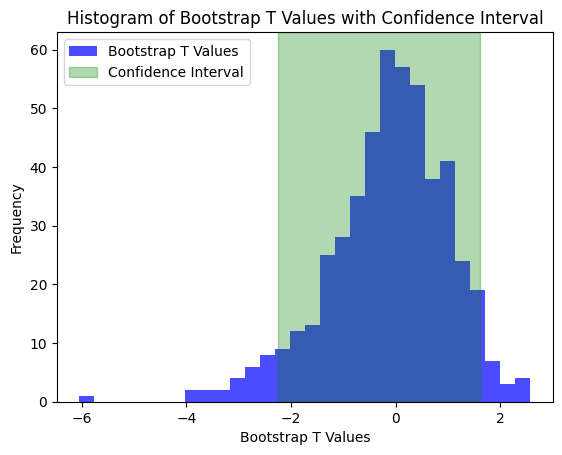

In [32]:
# Get Bootstrap t samples T Values
bootstrap_t_values = df_parameter_estimates_bootstrap_t['Sample Mean t Value']

# Confidence interval bounds.
lower_bound = bootstrap_t_lower_percentile_sample_mean_t
upper_bound = bootstrap_t_upper_percentile_sample_mean_t

# Plot the histogram.
plt.hist(bootstrap_t_values, bins=30, color='blue', alpha=0.7, label='Bootstrap T Values')

# Highlight the confidence interval in green.
plt.axvspan(lower_bound, upper_bound, color='green', alpha=0.3, label='Confidence Interval')

# Add labels and title.
plt.xlabel('Bootstrap T Values')
plt.ylabel('Frequency')
plt.title('Histogram of Bootstrap T Values with Confidence Interval')
plt.legend()

# Show plot.
plt.show()


### C.I. Histogram

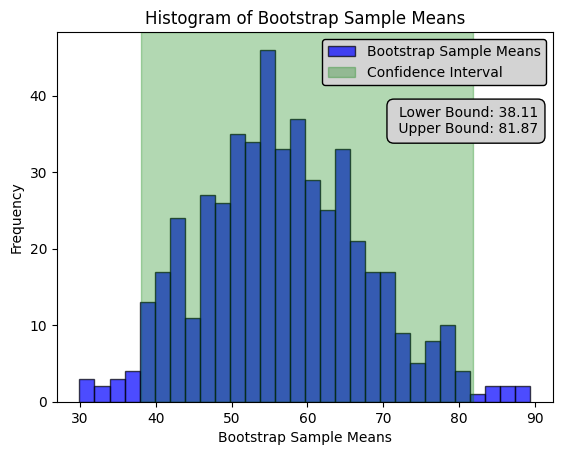

In [58]:
# Bootstrap t samples Sample Mean values.
bootstrap_t_sample_means = df_parameter_estimates_bootstrap_t['Sample Mean']

# Plot histogram of the means.
hist, bins, _ = plt.hist(bootstrap_t_sample_means, bins=30, color='blue', edgecolor='black', alpha=0.7, label='Bootstrap Sample Means')

# Highlight the confidence interval in green
plt.axvspan(bootstrap_t_lower_percentile_sample_mean, bootstrap_t_upper_percentile_sample_mean, color='green', alpha=0.3, label='Confidence Interval')

# Add labels and title
plt.xlabel('Bootstrap Sample Means')
plt.ylabel('Frequency')
plt.title('Histogram of Bootstrap Sample Means')

# Add confidence interval information in a legend-style box
plt.text(0.97, 0.80, 'Lower Bound: {:.2f}\n Upper Bound: {:.2f}'.format(bootstrap_t_lower_percentile_sample_mean, bootstrap_t_upper_percentile_sample_mean),
         color='black', ha='right', va='top', fontsize=10, bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.5', alpha=1), transform=plt.gca().transAxes)

# Legend
plt.legend(loc='upper right', facecolor='lightgrey', framealpha=1, edgecolor='black')

# Show plot
plt.show()


# Whitespace